In [1]:
import os
import pandas as pd
import numpy as np
import pandas as pd
#import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
pwd

'/home/sreenath/Documents/NOAA/SPLASH/SPLASH_scripts'

In [3]:
#read in all the data into one pandas frame
def create_df(source):
    source_dir = '/home/sreenath/Documents/NOAA/SPLASH/' + source
    print(source_dir)
    
    #move into the iop folder
    os.chdir(source_dir)
    
    df = pd.DataFrame()
    for i, file_name in enumerate(os.listdir(source_dir)):
        if file_name.endswith('.FLX1'):
            print(file_name)
    #        print(i)
            x = pd.read_table(file_name,delimiter=r"\s+")
            df = pd.concat([df,x],axis=0)            
    return df


In [4]:
#%pwd
#source directory inside SPLASH directory
#source = 'Tower_Data/Kettle_Ponds/KPA22_001-365'
file_dir = 'Tower_Data/Kettle_Ponds/KPA22_001-365'
KP10_flux_df = create_df(file_dir)

file_dir = 'Tower_Data/Kettle_Ponds/KPB22_001-365'
KP03_flux_df = create_df(file_dir)


/home/sreenath/Documents/NOAA/SPLASH/Tower_Data/Kettle_Ponds/KPA22_001-365
KPA22_298.FLX1
KPA22_226.FLX1
KPA22_262.FLX1
KPA22_187.FLX1
KPA22_173.FLX1
KPA22_334.FLX1
KPA22_066.FLX1
KPA22_103.FLX1
KPA22_091.FLX1
KPA22_311.FLX1
KPA22_122.FLX1
KPA22_304.FLX1
KPA22_125.FLX1
KPA22_247.FLX1
KPA22_204.FLX1
KPA22_048.FLX1
KPA22_337.FLX1
KPA22_264.FLX1
KPA22_201.FLX1
KPA22_348.FLX1
KPA22_254.FLX1
KPA22_052.FLX1
KPA22_138.FLX1
KPA22_296.FLX1
KPA22_032.FLX1
KPA22_210.FLX1
KPA22_011.FLX1
KPA22_289.FLX1
KPA22_170.FLX1
KPA22_018.FLX1
KPA22_013.FLX1
KPA22_301.FLX1
KPA22_039.FLX1
KPA22_278.FLX1
KPA22_198.FLX1
KPA22_342.FLX1
KPA22_335.FLX1
KPA22_332.FLX1
KPA22_045.FLX1
KPA22_231.FLX1
KPA22_177.FLX1
KPA22_012.FLX1
KPA22_151.FLX1
KPA22_294.FLX1
KPA22_307.FLX1
KPA22_269.FLX1
KPA22_070.FLX1
KPA22_236.FLX1
KPA22_190.FLX1
KPA22_135.FLX1
KPA22_058.FLX1
KPA22_237.FLX1
KPA22_283.FLX1
KPA22_102.FLX1
KPA22_364.FLX1
KPA22_078.FLX1
KPA22_359.FLX1
KPA22_169.FLX1
KPA22_221.FLX1
KPA22_153.FLX1
KPA22_191.FLX1
KPA22_089.

In [5]:

KP10_flux_df['date'] = pd.to_datetime(KP10_flux_df.date,format='%Y-%m-%d')
KP03_flux_df['date'] = pd.to_datetime(KP03_flux_df.date,format='%Y-%m-%d')


<Axes: xlabel='date'>

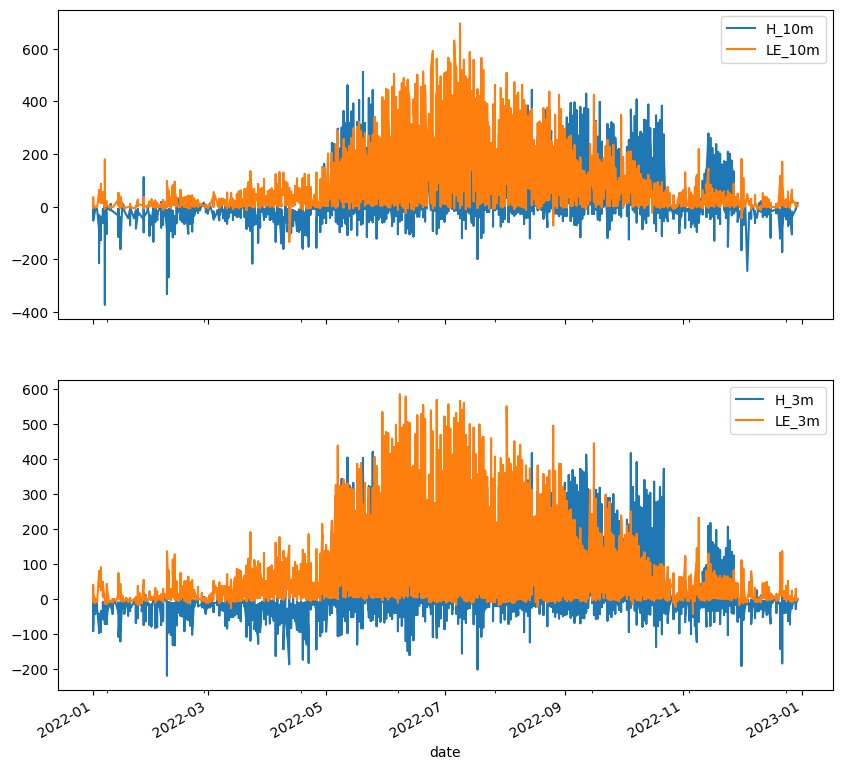

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1,  sharex=True, sharey=False, figsize=(10, 10))

def flux_qc_10(flux_df):
    #NAN filter
    H_f1 = flux_df['H_10m']!=-999
    #qc flag
    H_f2 = flux_df['qc_H'] < 1

    LE_f1 = flux_df['LE_10m']!=-999
    #qc flag
    LE_f2 = flux_df['qc_LE'] < 1
    
    return(flux_df.loc[H_f1 & H_f2 & LE_f1 & LE_f2])


def flux_qc_03(flux_df):
    #NAN filter
    H_f1 = flux_df['H_3m']!=-999
    #qc flag
    H_f2 = flux_df['qc_H'] < 1

    LE_f1 = flux_df['LE_3m']!=-999
    #qc flag
    LE_f2 = flux_df['qc_LE'] < 1
    
    return(flux_df.loc[H_f1 & H_f2 & LE_f1 & LE_f2])


flux_qc_10(KP10_flux_df).plot(x='date',y='H_10m',ax=ax1)
flux_qc_10(KP10_flux_df).plot(x='date',y='LE_10m',ax=ax1)

flux_qc_03(KP03_flux_df).plot(x='date',y='H_3m',ax=ax2)
flux_qc_03(KP03_flux_df).plot(x='date',y='LE_3m',ax=ax2)


Check out mid day bowen ratio, and soil moisture at the two levels.

In [7]:
KP10_flux_qc_df = flux_qc_10(KP10_flux_df).copy()
KP03_flux_qc_df = flux_qc_03(KP03_flux_df).copy()

In [8]:
# print(flux_qc_10(KP10_flux_df)['LE_10m'].size)
# print(flux_qc_03(KP03_flux_df)['LE_3m'].size)
#take the same time and make a df with entries at the same time:

flux_df_combined = pd.DataFrame()

flux_df_combined['date'] = KP10_flux_qc_df['date']
flux_df_combined['time(MST)'] = KP10_flux_qc_df['time(MST)']

flux_df_combined = flux_df_combined.merge(KP10_flux_qc_df, on=['date','time(MST)'], how='left')
flux_df_combined = flux_df_combined.merge(KP03_flux_qc_df, on=['date','time(MST)'], how='left')

In [9]:
flux_df_combined['date_time'] = pd.to_datetime(flux_df_combined['date'].astype(str) + ' ' + flux_df_combined['time(MST)'])

In [10]:
flux_df_combined = flux_df_combined.sort_values(by = 'date_time').set_index('date_time',drop=False)

In [11]:
flux_df_combined.columns

Index(['date', 'time(MST)', 'DecDay_x', 'H_10m', 'qc_H_x', 'LE_10m', 'qc_LE_x',
       'co2_flx_10m', 'co2_mix_ratio_x', 'Ts_10m', 'Tair_10m', 'pressure_x',
       'density_x', 'e_10m', 'es_10m', 'RH_x', 'Tdew_x', 'u_unrot_10m',
       'v_unrot_10m', 'w_unrot_10m', 'u_rot_10m', 'wind_speed_x',
       'max_wind_speed_x', 'wind_dir_x', 'u*_10m', 'TKE_10m', 'u_var_10m',
       'v_var_10m', 'w_var_10m', 'Ts_var_10m', 'co2_var_10m', 'h2o_var_10m',
       'DecDay_y', 'H_3m', 'qc_H_y', 'LE_3m', 'qc_LE_y', 'co2_flx_3m',
       'co2_mix_ratio_y', 'Ts_3m', 'Tair_3m', 'pressure_y', 'density_y',
       'e_3m', 'es_3m', 'RH_y', 'Tdew_y', 'u_unrot_3m', 'v_unrot_3m',
       'w_unrot_3m', 'u_rot_3m', 'wind_speed_y', 'max_wind_speed_y',
       'wind_dir_y', 'u*_3m', 'TKE_3m', 'u_var_3m', 'v_var_3m', 'w_var_3m',
       'Ts_var_3m', 'co2_var_3m', 'h2o_var_3m', 'date_time'],
      dtype='object')

In [69]:
# trial_flag1 = KP03_flux_qc_df['date'] >= '2022-01-01'
# trial_flag2 = KP03_flux_qc_df['date'] <= '2022-01-31'

# KP03_flux_qc_df.loc[trial_flag1 & trial_flag2]

In [12]:
pwd()

'/home/sreenath/Documents/NOAA/SPLASH/Tower_Data/Kettle_Ponds/KPB22_001-365'

In [17]:
#reading data from the kettle ponds minute data file
input_path = '/home/sreenath/Documents/NOAA/SPLASH/Tower_Data/Kettle_Ponds'
os.chdir(input_path)
kp_met_df = pd.read_csv("KP22_001-365.30METC",delim_whitespace=True)

In [18]:
kp_met_df.columns

Index(['date', 'time(MST)', 'DecDay', 'wsp_3m', 'wsp_5m', 'wsp_10m', 'dir_3m',
       'dir_5m', 'dir_10m', 'stheta_3m', 'stheta_5m', 'stheta_10m',
       'Pressure_Avg', 'RH_Avg', 'Tair1_3m', 'Tair2_3m', 'Tair1_5m',
       'Tair2_5m', 'Tair1_10m', 'Tair2_10m', 'SurfT1', 'SurfT1_C', 'SurfT2',
       'SurfT2_C', 'SurfT3', 'SurfT3_C', 'Ts_Ta', 'NetBodyT', 'Rg_in_avg',
       'Rg_out_avg', 'Lw_in_avg', 'Lw_out_avg', 'ghflx_a', 'ghflx_b',
       'ghflx_c', 'stor_a', 'stor_b', 'stor_c', 'SoilT2a_Avg', 'SoilT5a_Avg',
       'SoilT10a_Avg', 'SoilT20a_Avg', 'SoilT50a_Avg', 'SoilT2b_Avg',
       'SoilT5b_Avg', 'SoilT10b_Avg', 'SoilT20b_Avg', 'SoilT50b_Avg',
       'SoilT2c_Avg', 'SoilT5c_Avg', 'SoilT10c_Avg', 'SoilT20c_Avg',
       'SoilT50c_Avg'],
      dtype='object')

In [33]:
kp_met_df['date_time'] = pd.to_datetime(kp_met_df['date'].astype(str) + ' ' + kp_met_df['time(MST)'])
kp_met_df = kp_met_df.set_index('date_time')

In [54]:
flux_df_combined.columns

Index(['date', 'time(MST)', 'DecDay_x', 'H_10m', 'qc_H_x', 'LE_10m', 'qc_LE_x',
       'co2_flx_10m', 'co2_mix_ratio_x', 'Ts_10m', 'Tair_10m', 'pressure_x',
       'density_x', 'e_10m', 'es_10m', 'RH_x', 'Tdew_x', 'u_unrot_10m',
       'v_unrot_10m', 'w_unrot_10m', 'u_rot_10m', 'wind_speed_x',
       'max_wind_speed_x', 'wind_dir_x', 'u*_10m', 'TKE_10m', 'u_var_10m',
       'v_var_10m', 'w_var_10m', 'Ts_var_10m', 'co2_var_10m', 'h2o_var_10m',
       'DecDay_y', 'H_3m', 'qc_H_y', 'LE_3m', 'qc_LE_y', 'co2_flx_3m',
       'co2_mix_ratio_y', 'Ts_3m', 'Tair_3m', 'pressure_y', 'density_y',
       'e_3m', 'es_3m', 'RH_y', 'Tdew_y', 'u_unrot_3m', 'v_unrot_3m',
       'w_unrot_3m', 'u_rot_3m', 'wind_speed_y', 'max_wind_speed_y',
       'wind_dir_y', 'u*_3m', 'TKE_3m', 'u_var_3m', 'v_var_3m', 'w_var_3m',
       'Ts_var_3m', 'co2_var_3m', 'h2o_var_3m', 'date_time'],
      dtype='object')

<Axes: xlabel='date'>

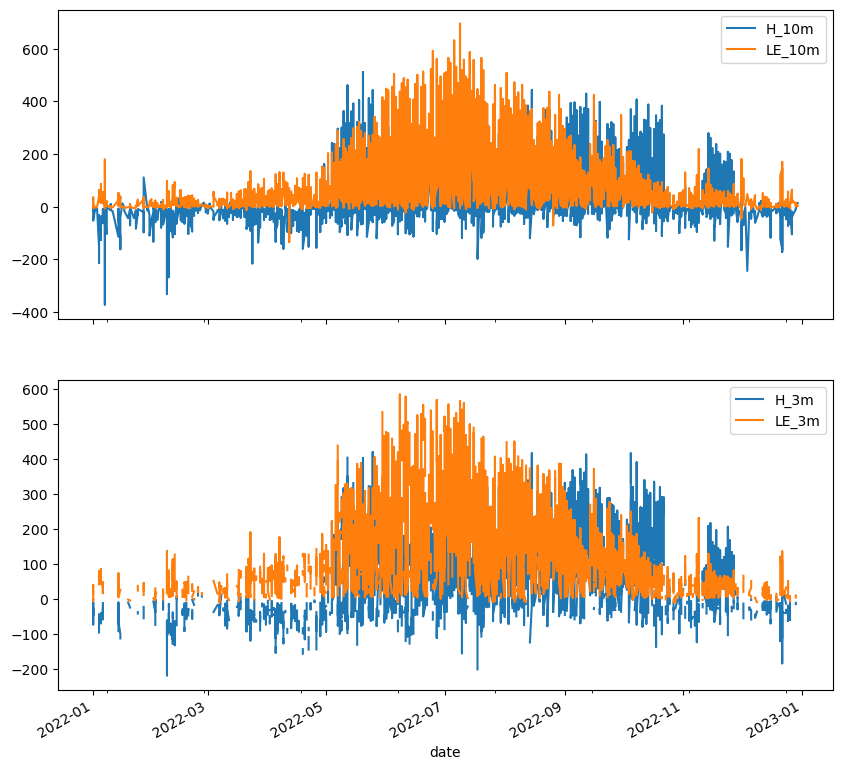

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1,  sharex=True, sharey=False, figsize=(10, 10))

flux_df_combined.plot(x='date',y='H_10m',ax=ax1)
flux_df_combined.plot(x='date',y='LE_10m',ax=ax1)

flux_df_combined.plot(x='date',y='H_3m',ax=ax2)
flux_df_combined.plot(x='date',y='LE_3m',ax=ax2)

<Axes: xlabel='date_time'>

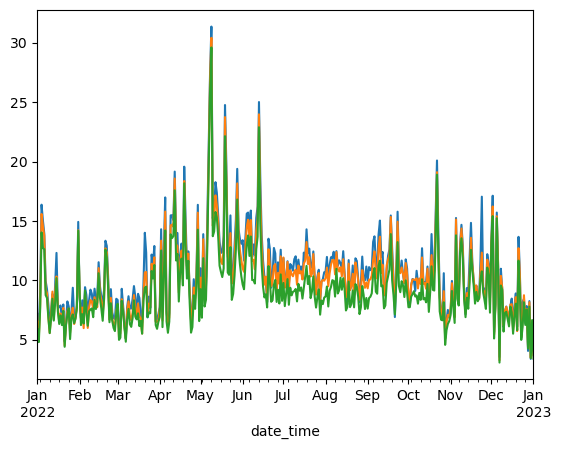

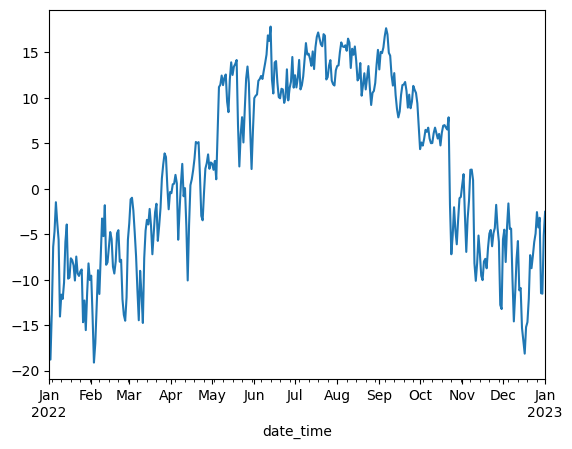

In [52]:

kp_met_df['stheta_3m'].resample('1D').mean().plot()
kp_met_df['stheta_5m'].resample('1D').mean().plot()
kp_met_df['stheta_10m'].resample('1D').mean().plot()

plt.figure()
kp_met_df['SurfT1_C'].resample('1D').mean().plot()

<Axes: xlabel='date_time'>

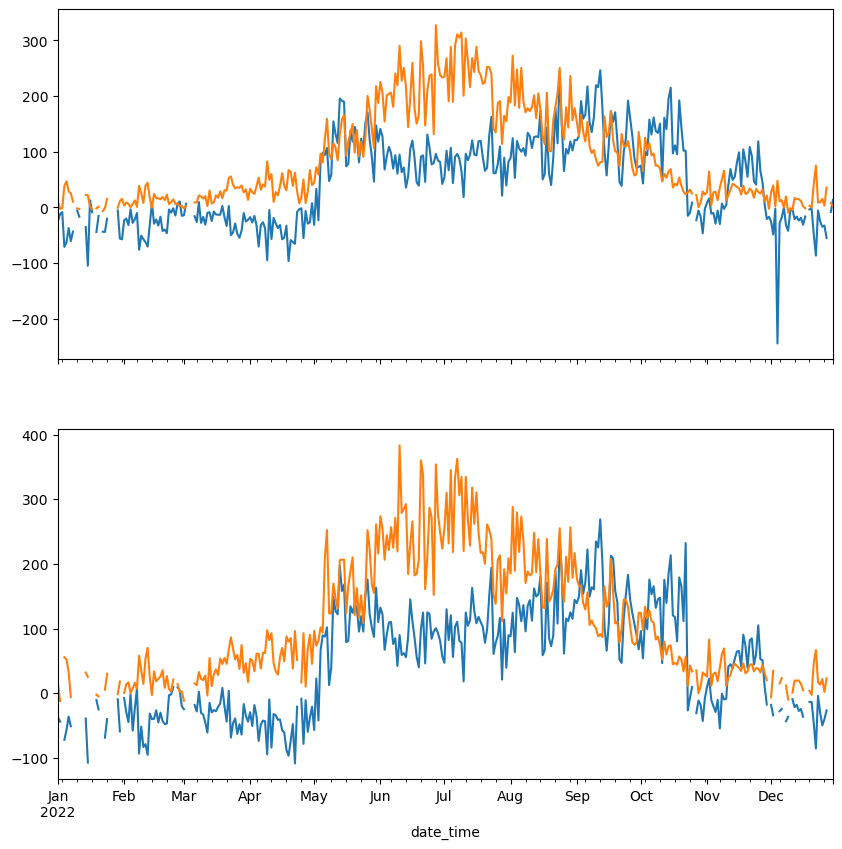

In [76]:
fig, (ax1, ax2) = plt.subplots(2, 1,  sharex=True, sharey=False, figsize=(10, 10))

flux_df_combined['H_10m'].resample('1D').mean().plot(ax=ax1)
flux_df_combined['LE_10m'].resample('1D').mean().plot(ax=ax1)

flux_df_combined['H_3m'].resample('1D').mean().plot(ax=ax2)
flux_df_combined['LE_3m'].resample('1D').mean().plot(ax=ax2)


In [110]:
# #f1 = kp_met_df.index > '2022-12-31 19:30:00'
# # kp_met_df['month'] = kp_met_df.index.month
# # kp_met_df['day'] = kp_met_df.index.day
# # kp_met_df['minute'] = kp_met_df.index.minute
# # kp_met_df['hour']  = kp_met_df.index.hour


# flux_df_combined['month'] = flux_df_combined.index.month
# flux_df_combined['day'] = flux_df_combined.index.day
# flux_df_combined['minute'] = flux_df_combined.index.minute
# flux_df_combined['hour']  = flux_df_combined.index.hour


In [122]:
kp_met_df

,date,time(MST),DecDay,wsp_3m,wsp_5m,wsp_10m,dir_3m,dir_5m,dir_10m,stheta_3m,...,SoilT2c_Avg,SoilT5c_Avg,SoilT10c_Avg,SoilT20c_Avg,SoilT50c_Avg,record,month,day,minute,hour
date_time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:30:00,2022-01-01,00:30:00,1.021,1.711,1.862,2.037,312.8,313.2,306.1,7.2,...,-0.30,-0.23,-0.16,0.13,1.91,1,1,1,30,0
2022-01-01 01:00:00,2022-01-01,01:00:00,1.042,1.896,2.078,2.300,288.7,290.5,287.5,4.8,...,-0.30,-0.23,-0.16,0.13,1.91,1,1,1,0,1
2022-01-01 01:30:00,2022-01-01,01:30:00,1.062,1.082,1.232,1.506,283.5,296.2,292.1,9.2,...,-0.30,-0.23,-0.16,0.13,1.91,1,1,1,30,1
2022-01-01 02:00:00,2022-01-01,02:00:00,1.083,2.079,2.244,2.487,305.8,307.7,304.0,3.7,...,-0.30,-0.23,-0.16,0.13,1.91,1,1,1,0,2
2022-01-01 02:30:00,2022-01-01,02:30:00,1.104,2.120,2.293,2.581,315.1,311.0,301.5,5.1,...,-0.30,-0.23,-0.16,0.13,1.91,1,1,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 22:00:00,2022-12-31,22:00:00,365.917,3.288,3.532,3.678,110.5,122.8,117.3,3.9,...,-0.97,-0.91,-0.78,-0.44,1.27,1,12,31,0,22
2022-12-31 22:30:00,2022-12-31,22:30:00,365.938,3.276,3.548,3.939,125.7,138.6,132.9,3.6,...,-0.97,-0.91,-0.78,-0.44,1.27,1,12,31,30,22
2022-12-31 23:00:00,2022-12-31,23:00:00,365.958,2.445,2.670,3.023,116.5,129.1,126.2,7.3,...,-0.97,-0.91,-0.78,-0.43,1.27,1,12,31,0,23


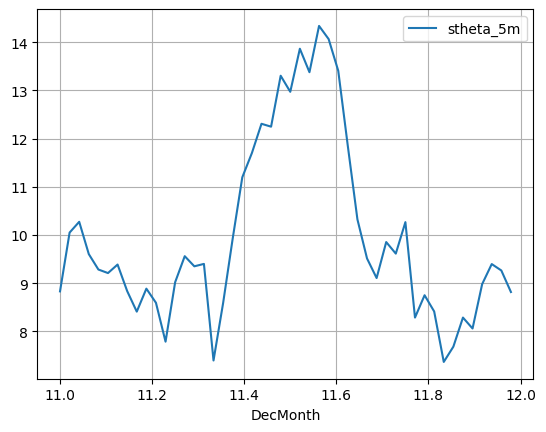

<Figure size 640x480 with 0 Axes>

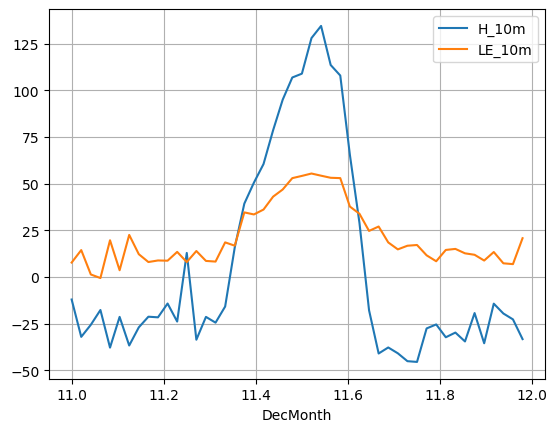

In [131]:
fig, (ax) = plt.subplots(1, 1)
df = kp_met_df.groupby(['month','hour','minute'])['stheta_5m'].mean().reset_index().copy()
df['DecMonth'] = df['month'] + df['hour']/24 + df['minute']/60/24
df[df['month']==11].plot(x='DecMonth',y='stheta_5m',ax=ax)
ax.grid()

plt.figure()
fig, (ax) = plt.subplots(1, 1)
df = flux_df_combined.groupby(['month','hour','minute'])[['H_10m','LE_10m']].mean().reset_index().copy()
df['DecMonth'] = df['month'] + df['hour']/24 + df['minute']/60/24
df[df['month']==11].plot(x='DecMonth',y='H_10m',ax=ax)
df[df['month']==11].plot(x='DecMonth',y='LE_10m',ax=ax)
ax.grid()

